# Stock Market (S&P 500) Sigma (standard deviation) Analysis


In [1]:
#created by John Broberg on 2022-05-29
#inspired by "LET THE WILD RUMPUS BEGIN" by JEREMY GRANTHAM of GMO
#ref. https://www.gmo.com/globalassets/articles/viewpoints/2022/gmo_let-the-wild-rumpus-begin_1-22.pdf

#https://www.gmo.com/americas/research-library/entering-the-superbubbles-final-act/
#"...superbubbles – 2.5 to 3 sigma events..."
#"...ordinary 2 sigma bubbles..."
#"Ordinary bubbles are, to us, those that reach a 2 sigma deviation from trend. Superbubbles reach 2.5 sigma or greater."

#source data: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd git/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git

#Get trendline equation
#https://stackoverflow.com/questions/49460596/add-trendline-with-equation-in-2d-array
#https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1731952601161.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Open,High,Low
0,11/15/2024,5870.62,5912.79,5915.32,5853.01
1,11/14/2024,5949.17,5989.68,5993.88,5942.28
2,11/13/2024,5985.38,5985.75,6008.19,5965.91
3,11/12/2024,5983.99,6003.60,6009.92,5960.08
4,11/11/2024,6001.35,6008.86,6017.31,5986.69
...,...,...,...,...,...
2522,11/24/2014,2069.41,2065.07,2070.17,2065.07
2523,11/21/2014,2063.50,2057.46,2071.46,2056.75
2524,11/20/2014,2052.75,2045.87,2053.84,2040.49
2525,11/19/2014,2048.72,2051.16,2052.14,2040.37


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,2527.000000,2527.000000,2527.000000,2527.000000
mean,3303.703807,3294.247044,3311.801789,3275.385683
std,1054.263134,1073.175594,1078.775479,1067.457785
min,1829.080000,0.000000,0.000000,0.000000
25%,2388.470000,2389.340000,2394.620000,2379.940000
50%,2972.370000,2969.950000,2985.030000,2955.920000
75%,4171.905000,4170.310000,4194.180000,4144.885000
max,6001.350000,6008.860000,6017.310000,5986.690000


In [3]:
#remove holidays (Open == 0)

df = df.loc[~(df['Open']==0)]
df.describe()

,Close/Last,Open,High,Low
count,2516.000000,2516.000000,2516.000000,2516.000000
mean,3309.136971,3308.649555,3326.281049,3289.705731
std,1053.345467,1053.124555,1058.614795,1047.531572
min,1829.080000,1833.400000,1847.000000,1810.100000
25%,2396.680000,2394.557500,2401.265000,2384.292500
50%,2977.180000,2978.475000,2989.625000,2963.005000
75%,4174.187500,4173.585000,4195.440000,4147.920000
max,6001.350000,6008.860000,6017.310000,5986.690000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 0 to 2526
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2516 non-null   object 
 1   Close/Last  2516 non-null   float64
 2   Open        2516 non-null   float64
 3   High        2516 non-null   float64
 4   Low         2516 non-null   float64
dtypes: float64(4), object(1)
memory usage: 117.9+ KB


In [5]:
df.shape

(2516, 5)

In [6]:
df.isnull().any()

Date          False
Close/Last    False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

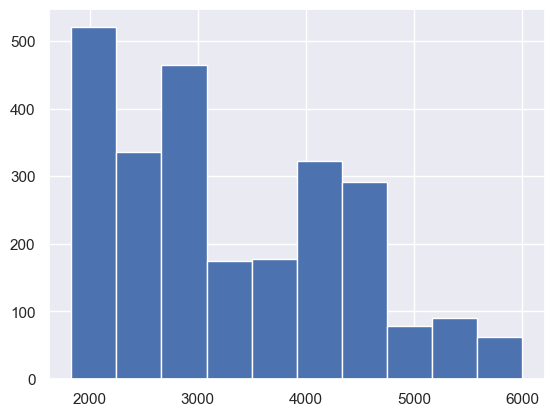

In [7]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [8]:
close_current = df['Close/Last'].iloc[0]
close_current

5870.62

In [9]:
close_mean = df['Close/Last'].mean()
close_mean

3309.136971383151

In [10]:
close_sd = df['Close/Last'].std()
close_sd

1053.3454673590857

In [11]:
sigma1 = close_mean + close_sd
sigma1

4362.482438742237

In [12]:
sigma2 = close_mean + (2 * close_sd)  #bubble (from trend) according to Grantham
sigma2

5415.827906101322

In [13]:
sigma2_5 = close_mean + (2.5 * close_sd)  #super bubble (from trend) according to Grantham
sigma2_5

5942.500639780865

In [14]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 0 to 2526
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2516 non-null   datetime64[ns]
 1   Close/Last  2516 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 59.0 KB


In [15]:
#Date Range
date_start = min(df1['Date']).date()
date_end = max(df1['Date']).date()

Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 2014-11-18 to 2024-11-15')

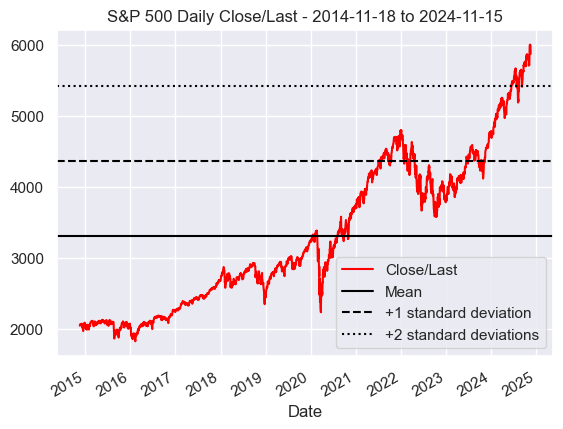

In [16]:
#Daily S&P 500 Close/Last, vs mean and standard deviations

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

df1.plot(x='Date', y='Close/Last', color = c)
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title(f'S&P 500 Daily Close/Last - {date_start} to {date_end}')

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 2014-11-18 to 2024-11-15')

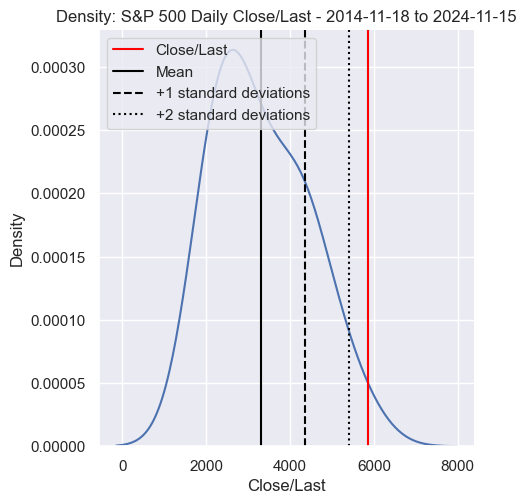

In [17]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html #kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df1['Close/Last'], kind='kde', bw_adjust=3.0) 

plt.axvline(close_current, color=c, label='Close/Last')
plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviations')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend(loc='upper left')
plt.title(f'Density: S&P 500 Daily Close/Last - {date_start} to {date_end}')

In [18]:
z_score = (close_current - close_mean)/close_sd
z_score

2.431759672388317

In [19]:
# https://realpython.com/linear-regression-in-python/
#Step 4: Get results